# Preliminaries

### Imports

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

# Dimensionality reduction

Reading the preprocessed, scaled and encoded dataset

In [4]:
df_scaled = pd.read_csv('Data/dataset_preprocessed.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Data/df_scaled.csv'

### 1. Principal component analysis

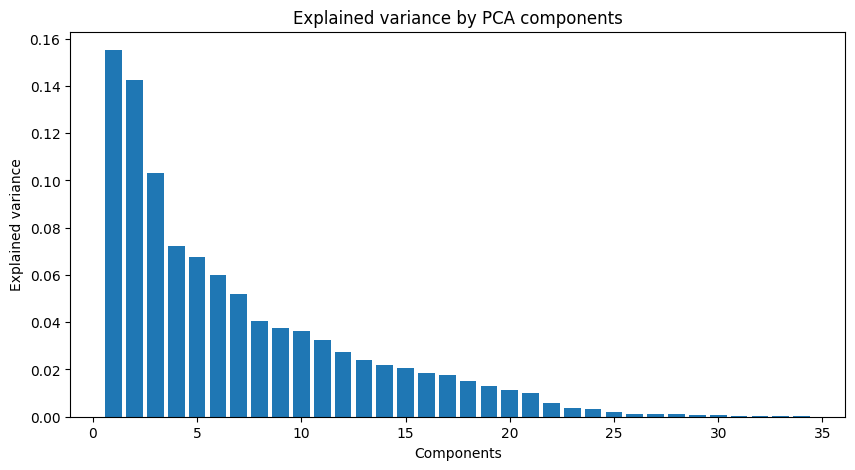

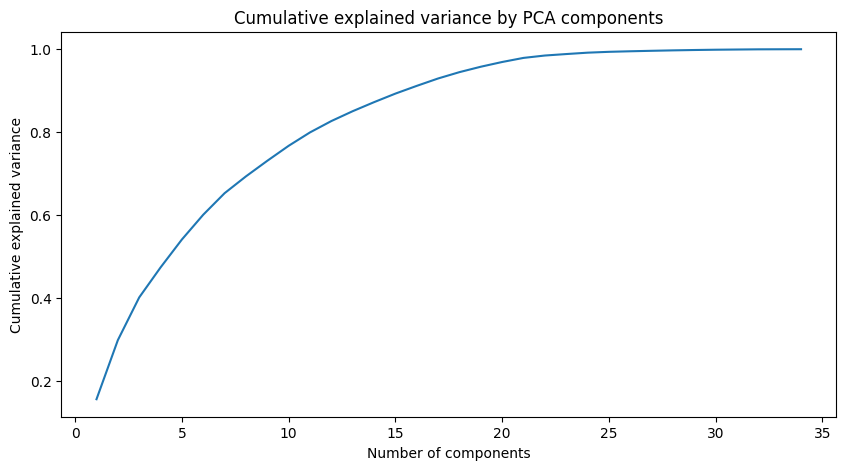

                                  PC1       PC2       PC3       PC4       PC5  \
releaseYear                  0.001741 -0.025171  0.034494  0.020165 -0.028919   
runtimeMinutes              -0.014196 -0.002152 -0.011160  0.007834  0.001856   
studio                      -0.006005  0.009232 -0.051365 -0.016274  0.031738   
lifetimeGross                0.011045 -0.001094 -0.013248  0.012799  0.004723   
nrOfLanguages                0.002577  0.002515 -0.032672  0.009640  0.012303   
director_nrOfMovies          0.001888  0.002458 -0.003854  0.000064  0.000711   
nrOfEmployees               -0.002986  0.010020 -0.026539  0.010742  0.002737   
nrOfActors                  -0.024621  0.038190 -0.069240  0.013085  0.015610   
numVotes                     0.003713 -0.004202 -0.011307  0.007577  0.003490   
sameYearTotalMoviesReleased  0.007759 -0.081069  0.096135  0.066872 -0.084189   
Action                       0.101622 -0.119549 -0.237151  0.130735  0.019063   
Adult                       

In [187]:
pca = PCA()  
features = df_scaled.drop('averageRating', axis=1)
principalComponents = pca.fit_transform(features)

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained variance by PCA components')
plt.show()

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title('Cumulative explained variance by PCA components')
plt.show()

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

loading_matrix = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(len(principalComponents[0]))], index=features.columns)
print(loading_matrix)


print("$$$$$$$$$$$$$$$$$$$$$$$$$")
abs_loading_matrix = np.abs(loading_matrix)

significant_components = abs_loading_matrix.iloc[:5]  
mean_loadings = significant_components.mean(axis=0)
sorted_loadings = mean_loadings.sort_values()

print("Features sorted by their contributions (ascending):")
print(sorted_loadings)




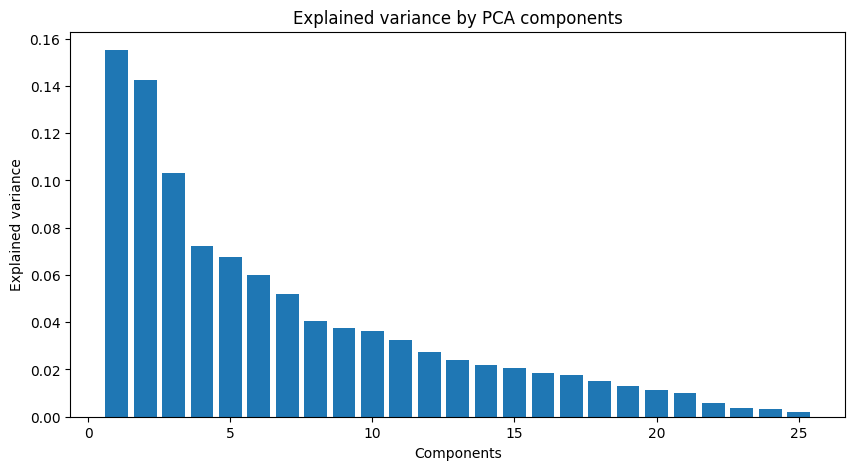

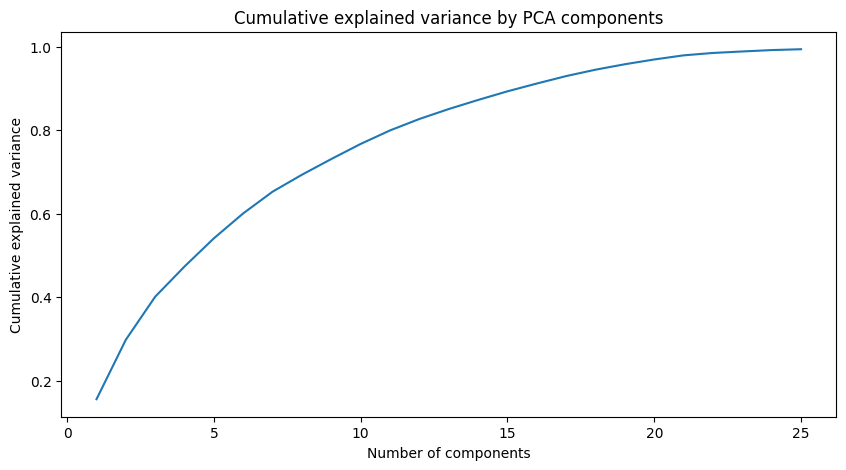

In [188]:
n = 25 
pca_reduced = PCA(n_components=n)
principalComponents_reduced = pca_reduced.fit_transform(features)

df_reduced = pd.DataFrame(data=principalComponents_reduced, columns=[f'PC{i+1}' for i in range(n)])

plt.figure(figsize=(10, 5))
plt.bar(range(1, len(pca_reduced.explained_variance_ratio_) + 1), pca_reduced.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.title('Explained variance by PCA components')
plt.show()

cumulative_variance = np.cumsum(pca_reduced.explained_variance_ratio_)
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.ylabel('Cumulative explained variance')
plt.xlabel('Number of components')
plt.title('Cumulative explained variance by PCA components')
plt.show()

Test with logistic regression

Metrics for LR1:
Accuracy: 0.7356
Weighted F1: 0.7255
Weighted Precision: 0.7277
Weighted Recall: 0.7356
Macro-Averaged Precision: 0.4926
Macro-Averaged Recall: 0.4845
F1: [0.         0.78524125 0.66769073]
Precision: [0.         0.7284962  0.74942529]
Confusion Matrix


c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

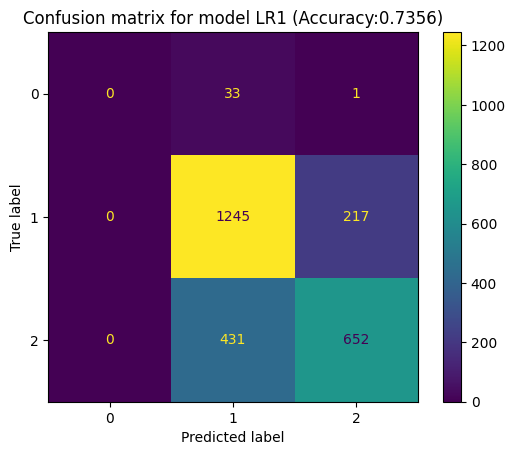

In [189]:
# Utilities
import pandas as pd
import warnings
import matplotlib.pyplot as plt

# Models
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
def calculate_metrics(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Weighted F1': f1_score(y_true, y_pred, average='weighted'),
        'Weighted Precision': precision_score(y_true, y_pred, average='weighted'),
        'Weighted Recall': recall_score(y_true, y_pred, average='weighted'),
        'Macro-Averaged Precision': precision_score(y_true, y_pred, average='macro'),
        'Macro-Averaged Recall': recall_score(y_true, y_pred, average='macro'),
        'F1': str(f1_score(y_true, y_pred, average=None)),
        'Precision': str( precision_score(y_true, y_pred, average=None)),
    }
    
    # Print the metrics
    print(f"Metrics for {model_name}:")
    for metric_name, metric_value in metrics.items():
        try:
            print(f"{metric_name}: {metric_value:.4f}")
        except:
            print(f"{metric_name}: {metric_value}")

    print("Confusion Matrix")
    cm = confusion_matrix(y_true, y_pred)
    cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
    cmd.plot()
    
    plt.title(f'Confusion matrix for model {model_name} (Accuracy:{metrics["Accuracy"]:.4f})')
    plt.show()
    
    # Create df to store metrics
    df_metrics = pd.DataFrame(metrics, index=[model_name])
    
    return df_metrics

test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    df_reduced, 
    df['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

### 2. t-distributed stochastic neighbor embedding

KeyboardInterrupt: 

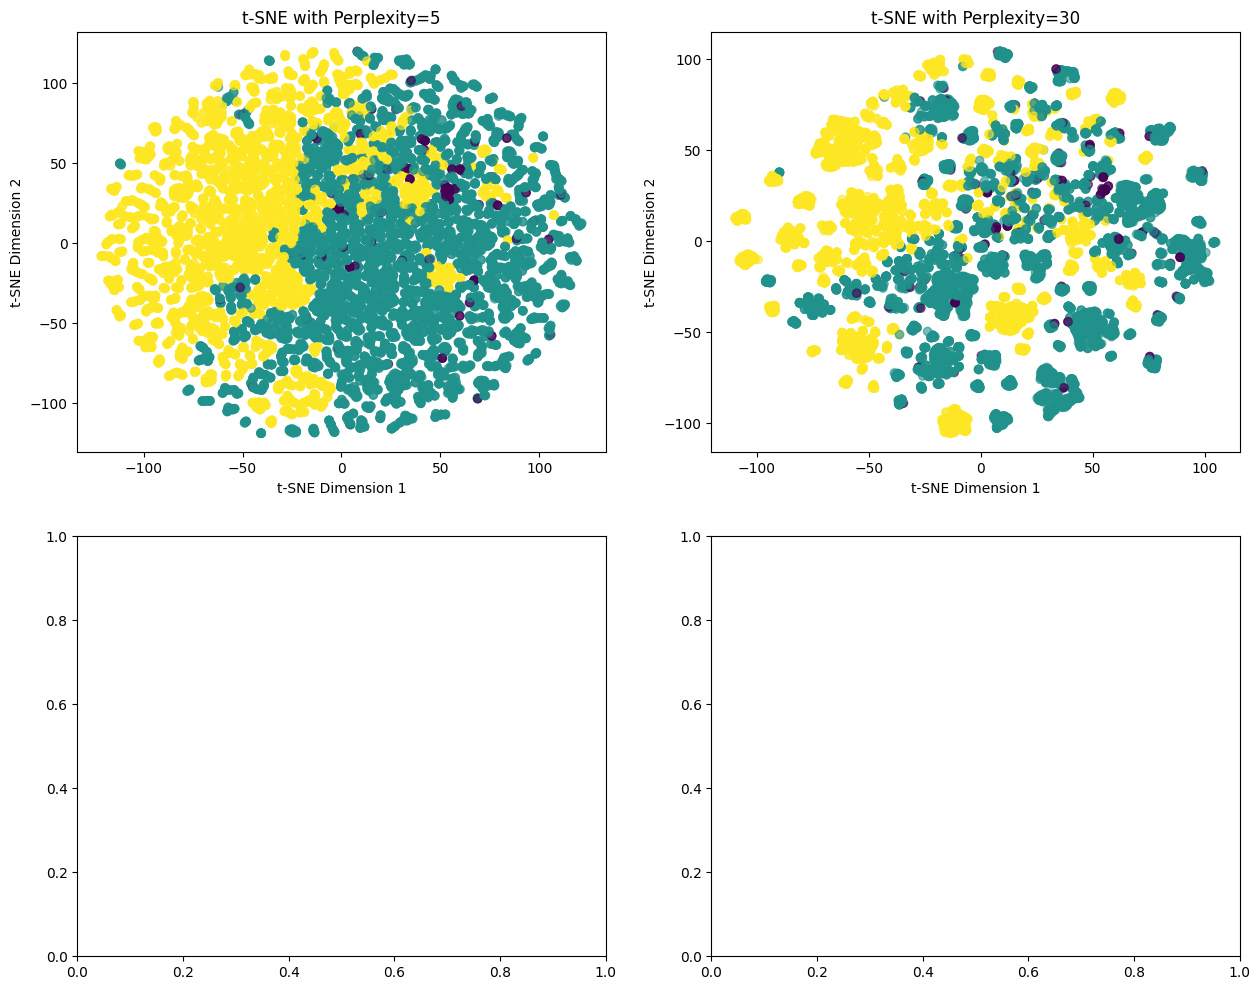

In [198]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

n_components = 2
perplexities = [5, 30, 50, 100]
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.flatten()

for idx, perplexity in enumerate(perplexities):
    tsne = TSNE(n_components=n_components, perplexity=perplexity, n_iter=1000, random_state=42)
    tsne_results = tsne.fit_transform(df_scaled)
    sc = axs[idx].scatter(tsne_results[:, 0], tsne_results[:, 1], c=df['averageRating'], cmap='viridis', alpha=0.6)
    axs[idx].set_title(f't-SNE with Perplexity={perplexity}')
    axs[idx].set_xlabel('t-SNE Dimension 1')
    axs[idx].set_ylabel('t-SNE Dimension 2')

fig.colorbar(sc, ax=axs, orientation='vertical', fraction=0.01, pad=0.1, label='Average rating')
plt.show()


In [212]:
tsne = TSNE(random_state=42, n_iter=1000, perplexity=30, n_components=3) # method used is Barnes-Hut. "exact" method takes way too much time
tsne_results = tsne.fit_transform(scaled_features)


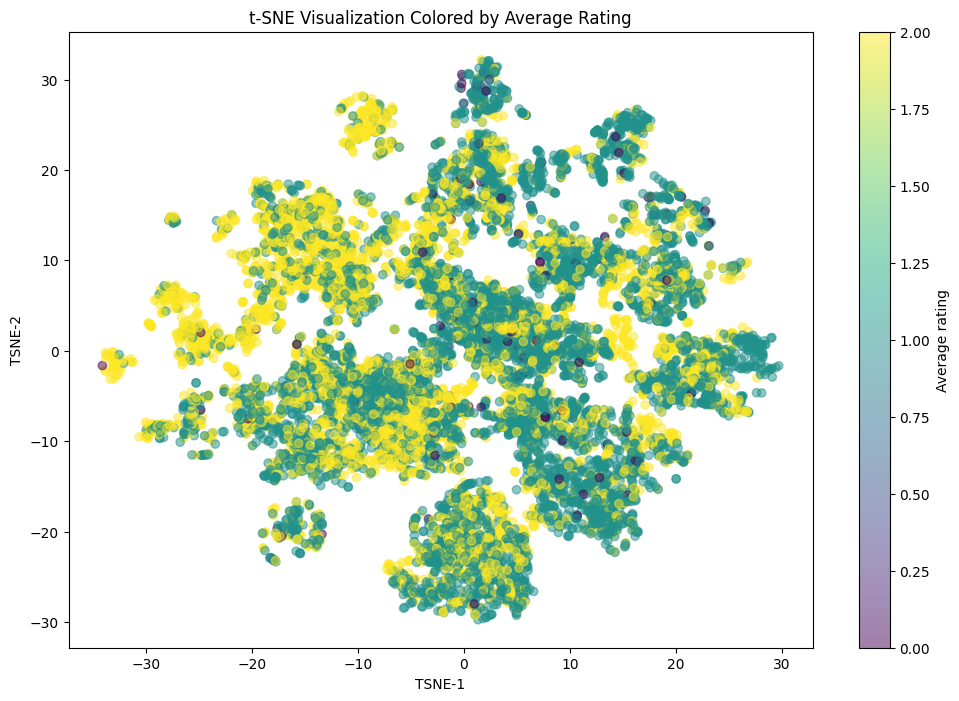

In [213]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Average rating')
plt.title('t-SNE Visualization Colored by Average Rating')
plt.xlabel('TSNE-1')
plt.ylabel('TSNE-2')
plt.show()

Metrics for LR1:
Accuracy: 0.6371
Weighted F1: 0.6158
Weighted Precision: 0.6262
Weighted Recall: 0.6371
Macro-Averaged Precision: 0.4222
Macro-Averaged Recall: 0.4099
F1: [0.         0.72045591 0.49385475]
Precision: [0.         0.64155983 0.6251768 ]
Confusion Matrix


c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

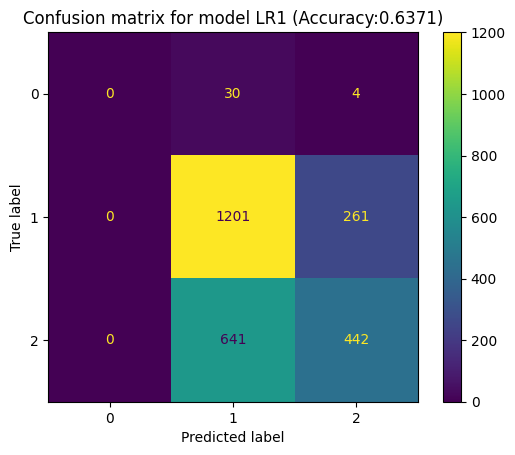

In [214]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    tsne_results, 
    df['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

### 3. Linear Discriminant Analysis

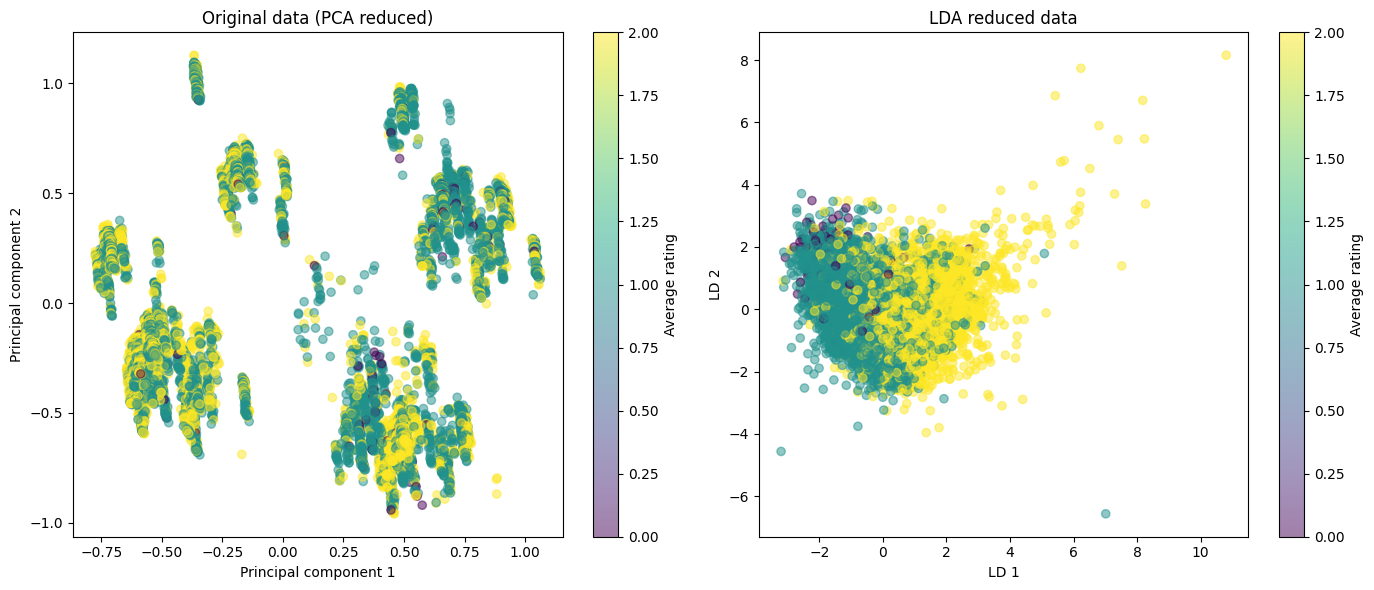

In [193]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

features = df_scaled.drop('averageRating', axis=1)
labels = df['averageRating']
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  
plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels, alpha=0.5)
plt.title('Original data (PCA reduced)')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.colorbar(label='Average rating')
lda = LDA(n_components=2) 
features_lda = lda.fit_transform(features, labels)

plt.subplot(1, 2, 2) 
plt.scatter(features_lda[:, 0], features_lda[:, 1], c=labels, alpha=0.5)
plt.title('LDA reduced data')
plt.xlabel('LD 1')
plt.ylabel('LD 2')
plt.colorbar(label='Average rating')

plt.tight_layout()
plt.show()


Metrics for LR1:
Accuracy: 0.5448
Weighted F1: 0.5020
Weighted Precision: 0.5104
Weighted Recall: 0.5448
Macro-Averaged Precision: 0.3384
Macro-Averaged Recall: 0.3396
F1: [0.         0.66552217 0.29711479]
Precision: [0.         0.57206099 0.44322344]
Confusion Matrix


c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

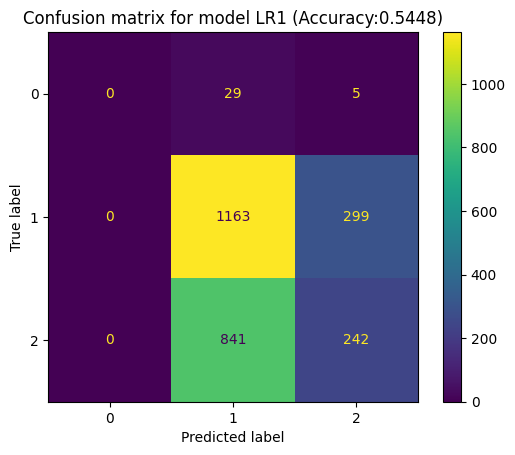

In [216]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    features_pca, 
    df['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)

Metrics for LR1:
Accuracy: 0.7538
Weighted F1: 0.7447
Weighted Precision: 0.7458
Weighted Recall: 0.7538
Macro-Averaged Precision: 0.5051
Macro-Averaged Recall: 0.4980
F1: [0.         0.79873016 0.69503546]
Precision: [0.         0.74526066 0.76992144]
Confusion Matrix


c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\cocon\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

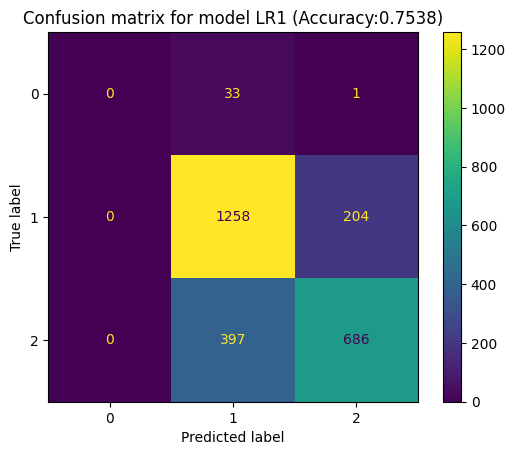

In [217]:
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(
    features_lda, 
    df['averageRating'], test_size=test_size, 
    random_state=42
)
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
model_metrics = calculate_metrics('LR1', y_test, predictions)